# SENTIMENT ANALYSIS OF TEXT MESSAGES 

Sentiment analysis of text messages is the process of determining the `sentiment` or `emotional tone` expressed. It involves analyzing the text to identify and categorize the sentiment as `positive`, `negative`, or `neutral`. The goal is to understand the subjective opinions, attitudes, or emotions conveyed by the text.

In this project, `TextBlob` is used in sentiment analysis of text messages, offering different functionalities and approaches. 
`Neattext` is used for data cleaning an pre-processing of data

- TextBlob - 
TextBlob is a Python library that provides a simple and intuitive API for natural language processing tasks, including sentiment analysis. It offers built-in sentiment analysis capabilities based on pre-trained models.TextBlob's sentiment analysis feature provides a polarity score and subjectivity score for a given text. The polarity score indicates the sentiment as positive (score > 0), negative (score < 0), or neutral (score = 0), while the subjectivity score represents the degree of subjective or objective nature of the text

- NeatText - 
NeatText is a Python library that offers text preprocessing functions for cleaning and normalizing text data. It provides various text cleaning operations to remove noise, normalize text, and handle common text-related issues.NeatText offers functions to remove special characters, URLs, email addresses, numbers, and other unwanted elements from text. It helps to eliminate noise and focus on the meaningful content for sentiment analysis.

Using `seaborn` library Exploratory Data Analysis is also done to visualize the characteristics of the dataset.

## Statistical Analysis, Visualization, Data processing and Sentimental Anaysis

### About the dataset

The dataset initialy contains `2` features
1. **Emotion**
2. **Text**

Emotion has 8 particulars namely,
- Joy
- Anger
- Sad
- Surprise
- Disgust
- Shame
- Neutral
- Fear

Text has the messages on which the Analysis is to be performed

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import neattext.functions as nfx
import seaborn as sns
import matplotlib.pyplot as plt

### Importing the data

In [2]:
df=pd.read_csv("E:\DA_PROJECTS\SENTIMENT-ANALYSIS\dataset.csv")
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [3]:
df.tail()

,Emotion,Text
34787,surprise,@MichelGW have you gift! Hope you like it! It'...
34788,joy,The world didnt give it to me..so the world MO...
34789,anger,A man robbed me today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO..."
34791,sadness,"I think about you baby, and I dream about you ..."


### Statistical Exploration of the data

In [4]:
df.shape

(34792, 2)

In [5]:
df.describe()

,Emotion,Text
count,34792,34792
unique,8,31105
top,joy,Yes .
freq,11045,76


In [6]:
df.isnull().sum()

Emotion    0
Text       0
dtype: int64

In [7]:
df.dtypes

Emotion    object
Text       object
dtype: object

In [8]:
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

### Visualizing the emotion feature

<AxesSubplot:>

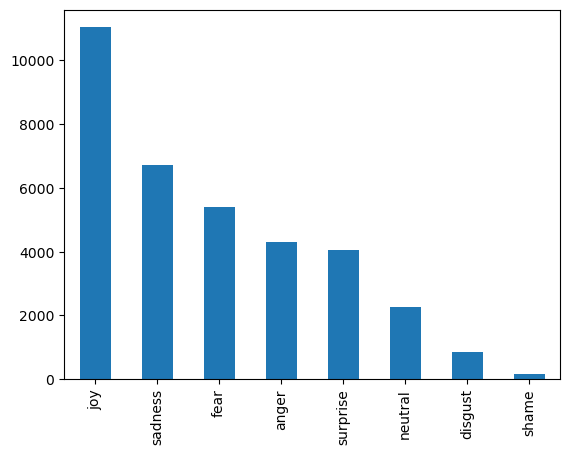

In [9]:
df['Emotion'].value_counts().plot(kind='bar')

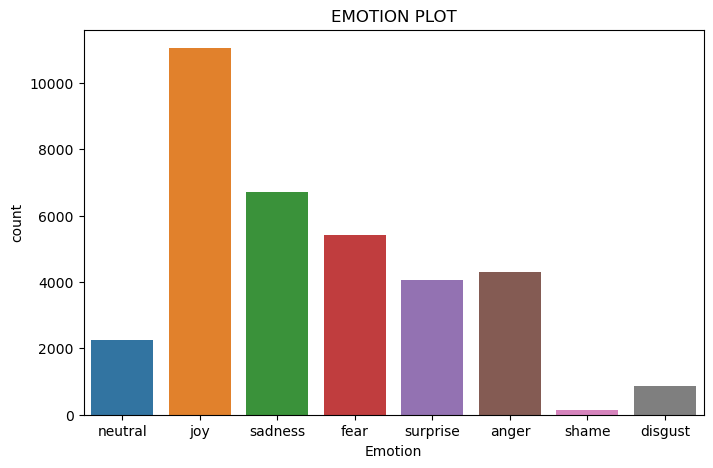

In [10]:
plt.figure(figsize=(8,5))
plt.title("EMOTION PLOT")
sns.countplot(x='Emotion',data=df)
plt.show()

### Performing Sentiment Analysis using TextBlob

In [11]:
from textblob import TextBlob

In [12]:
def get_sentiment(text):
    blob=TextBlob(text)
    sentiment= blob.sentiment.polarity
    if sentiment >0:
        result='Positive'
    elif sentiment <0:
        result= 'Negative'
    else:
        result= 'Neutral'
    return result

In [13]:
get_sentiment('I was late to my class')

'Negative'

Analysed result using TextBlob is appied to every "TEXT" feature of the data to predict the emotional tone. The obtained result is stored as a seperate feature in the dataset and compared with the actual emotion   

In [14]:
df['Sentiment']=df['Text'].apply(get_sentiment)
df.head()

,Emotion,Text,Sentiment
0,neutral,Why ?,Neutral
1,joy,Sage Act upgrade on my to do list for tommorow.,Neutral
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative
3,joy,Such an eye ! The true hazel eye-and so brill...,Positive
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral


A rough comparison is made for actual and predicted emotion given by the text. We can see that different emotions are differently predicted and categorized for different messages. 

In [15]:
#comparison of actual and predicted
df.groupby(['Emotion','Sentiment']).size()

Emotion   Sentiment
anger     Negative     1787
          Neutral      1386
          Positive     1124
disgust   Negative      324
          Neutral       251
          Positive      281
fear      Negative     1534
          Neutral      1844
          Positive     2032
joy       Negative     1682
          Neutral      3649
          Positive     5714
neutral   Negative      178
          Neutral      1523
          Positive      553
sadness   Negative     2629
          Neutral      2128
          Positive     1965
shame     Negative       46
          Neutral        50
          Positive       50
surprise  Negative      623
          Neutral      1545
          Positive     1894
dtype: int64

We can observe that different emotions are differently categorized. As mentioned, `Joy` is predicted as 
-  `Negative` in 1682 messages
-  `Neutral` in 3649 messages
-  `Positive` in 5714 messages

### Plotting predicted emotion using TextBlob 

Text(0.5, 1.0, 'PREDICTED EMOTION')

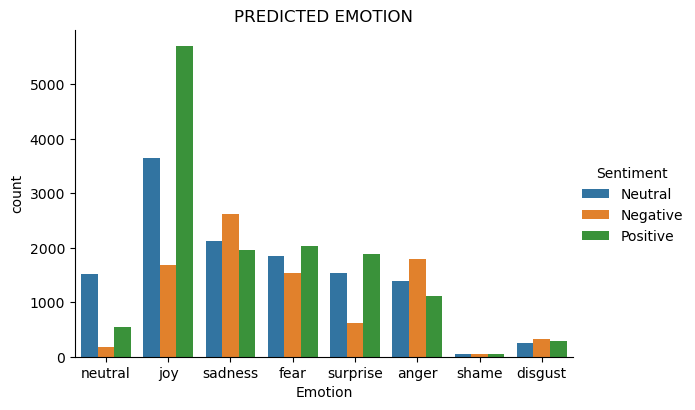

In [16]:
sns.catplot(x='Emotion',hue='Sentiment',data=df,kind='count',height=4,aspect=1.5)
plt.title("PREDICTED EMOTION")

### Text Cleaning

This function returns a list of all the attributes and methods available in the `nfx` module of the `neattext` library performing the following functions
- removes stopwords
- removes punctuations
- removes usernames
- removes urls
- removes emails
- removes hashtags
- removes numbers
- removes special characters
- removes multiple spaces

In [17]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [18]:
df['Text']

0                                                   Why ? 
1          Sage Act upgrade on my to do list for tommorow.
2        ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3         Such an eye ! The true hazel eye-and so brill...
4        @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...
                               ...                        
34787    @MichelGW have you gift! Hope you like it! It'...
34788    The world didnt give it to me..so the world MO...
34789                             A man robbed me today . 
34790    Youu call it JEALOUSY, I call it of #Losing YO...
34791    I think about you baby, and I dream about you ...
Name: Text, Length: 34792, dtype: object

Displaying clean text which got rid of `stopwords`, `punctuations`, `user handles` as a new feature in the dataset

In [19]:
df['Clean_text']=df['Text'].apply(nfx.remove_stopwords)

In [20]:
df['Clean_text']=df['Clean_text'].apply(nfx.remove_punctuations)

In [21]:
df['Clean_text']=df['Clean_text'].apply(nfx.remove_userhandles)

In [22]:
df[['Text','Clean_text']]

,Text,Clean_text
0,Why ?,
1,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...
34787,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,A man robbed me today .,man robbed today
34790,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


The `Counter` class is a container that provides a convenient way to count the occurrences of elements in a collection or iterable. It is a specialized dictionary subclass where elements in the collection are stored as keys, and their counts are stored as values

In [23]:
from collections import Counter

In [24]:
def extract_keywords(text,num=50):
    tokens= [tok for tok in text.split()]
    most_common_tokens=Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [25]:
emotion_list=df['Emotion'].unique().tolist()

Lisitng the different emotions displayed by the text messages

In [26]:
emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

Displaying the clean text messages which shows `Joy` emotion

In [27]:
joy_list=df[df['Emotion']=='joy']['Clean_text'].tolist()
joy_list

['Sage Act upgrade list tommorow',
 'eye  true hazel eyeand brilliant  Regular features  open countenance  complexion  Oh  bloom health  pretty height size  firm upright figure  health  merely bloom  air  head  glance  hears child  picture health    gives idea complete picture grownup health  loveliness ',
 '  ugh babe hugggzzz u  babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko ang',
 'life  Leopold truly happy : hopes prayers beloved son come fruition ',
 'feeling fail french #fuckfrench',
 'GoodLet  ',
 'fell love \\X\\ Overnight felt confidence selfesteem responsible worthwhile',
 'terribly ecstatic dangerous thing ',
 'selected study university',
 'Yeah  ’ ages  ',
 'passed BA exams class results',
 'heard selected fot year university Zambia form Chikola secondary school',
 'Welp time study days',
 'Heading campus rain grad photos',
 'feeling awesome ',
 '  brings  Ive bought Christmas presents trawl loads shops :)',
 'shit pants Pure 100% gravy',
 'life  Leopold

In [28]:
joy_docx=''.join(joy_list)
joy_docx

'Sage Act upgrade list tommoroweye  true hazel eyeand brilliant  Regular features  open countenance  complexion  Oh  bloom health  pretty height size  firm upright figure  health  merely bloom  air  head  glance  hears child  picture health    gives idea complete picture grownup health  loveliness   ugh babe hugggzzz u  babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko anglife  Leopold truly happy : hopes prayers beloved son come fruition feeling fail french #fuckfrenchGoodLet  fell love \\X\\ Overnight felt confidence selfesteem responsible worthwhileterribly ecstatic dangerous thing selected study universityYeah  ’ ages  passed BA exams class resultsheard selected fot year university Zambia form Chikola secondary schoolWelp time study daysHeading campus rain grad photosfeeling awesome   brings  Ive bought Christmas presents trawl loads shops :)shit pants Pure 100% gravylife  Leopold truly happy : hopes prayers beloved son come fruition Class jamming paper quarter rea

### Keyword Extraction

In [29]:
keyword_joy=extract_keywords(joy_docx)
keyword_joy

{'amp': 652,
 'day': 582,
 'time': 468,
 'Im': 453,
 'like': 439,
 'work': 400,
 'Christmas': 370,
 'today': 318,
 'good': 312,
 'tomorrow': 304,
 'happy': 303,
 'love': 283,
 'going': 283,
 'night': 249,
 'got': 248,
 'home': 248,
 'school': 233,
 '2': 232,
 'morning': 225,
 'joy': 214,
 'life': 208,
 'hours': 201,
 'feel': 193,
 'year': 183,
 'people': 179,
 'long': 178,
 's': 176,
 'new': 172,
 'great': 168,
 'days': 166,
 'week': 163,
 'sleep': 158,
 'know': 158,
 'family': 157,
 'RT': 156,
 'hour': 152,
 'God': 143,
 ':)': 143,
 'cant': 137,
 'excited': 135,
 'tonight': 134,
 'friends': 128,
 'feeling': 126,
 'felt': 126,
 'friend': 126,
 'right': 124,
 '3': 123,
 'old': 121,
 'me': 121,
 'think': 119}

In [30]:
def plot_common(mydict,name):
    df_1=pd.DataFrame(mydict.items(),columns=['token','count'])
    plt.figure(figsize=(20,8))
    plt.title("Plot of words depicting {}".format(name))
    sns.barplot(x='token',y='count',data=df_1)
    plt.xticks(rotation=90)
    plt.show()

Visualizing the keywords depicting `Joy` emotion

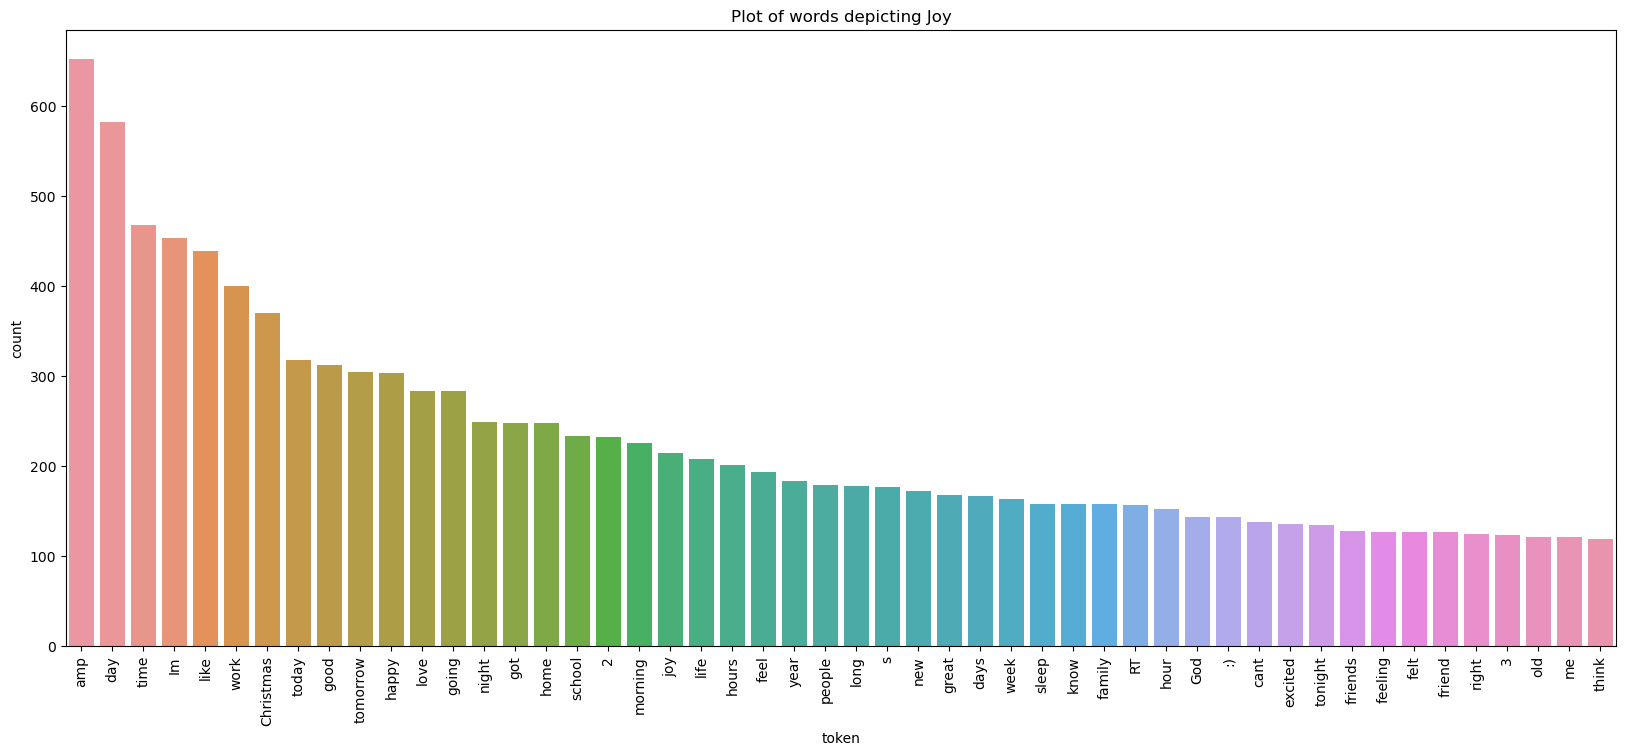

In [31]:
plot_common(keyword_joy,"Joy")

In [32]:
anger_list=df[df['Emotion']=='anger']['Clean_text'].tolist()

In [33]:
anger_docx=''.join(anger_list)

In [34]:
keyword_anger=extract_keywords(anger_docx)
keyword_anger

{'angry': 233,
 '’': 197,
 'anger': 186,
 'time': 169,
 'friend': 158,
 's': 156,
 'people': 155,
 'like': 151,
 'got': 141,
 'said': 116,
 'Im': 116,
 'told': 116,
 'felt': 104,
 'day': 103,
 'want': 102,
 'work': 99,
 'feel': 88,
 'going': 85,
 'cant': 81,
 'know': 80,
 'home': 79,
 'mad': 77,
 'way': 76,
 'exasperation': 76,
 'me': 75,
 'face': 75,
 'it': 75,
 'person': 75,
 'things': 75,
 'right': 74,
 'hate': 72,
 'good': 71,
 'car': 68,
 'resentful': 67,
 'away': 67,
 'think': 67,
 'went': 66,
 'wanted': 66,
 'furious': 65,
 'thought': 65,
 'annoyance': 64,
 'indignant': 64,
 'asked': 64,
 'amp': 61,
 'friends': 60,
 'mother': 60,
 'school': 58,
 'brother': 57,
 'man': 57,
 'night': 56}

Visualizng the keywords depicting `Anger` emotion

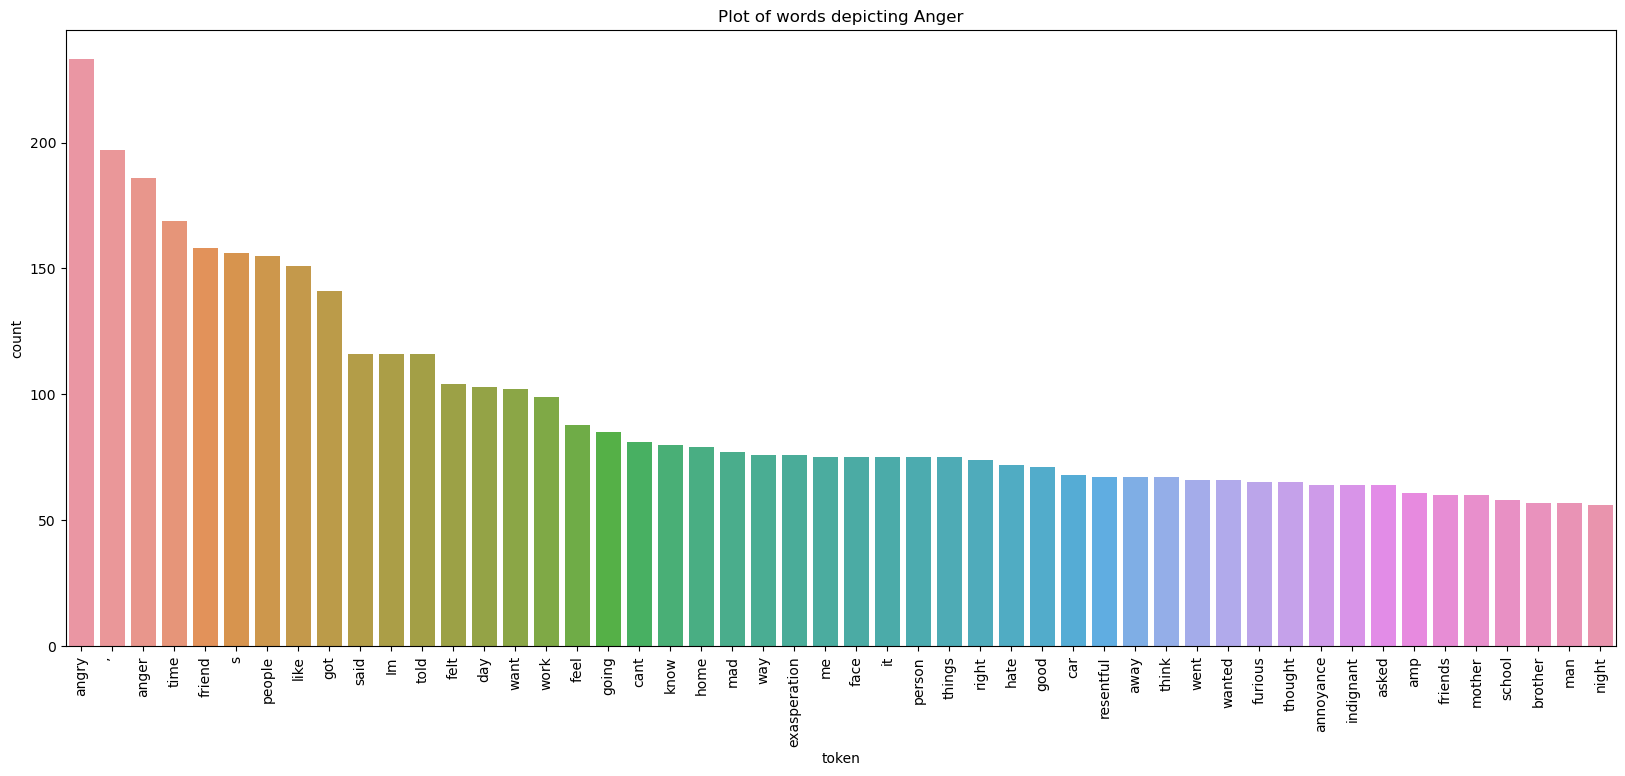

In [35]:
plot_common(keyword_anger,"Anger")

### Word Cloud

A word cloud is a visualization technique used in sentiment analysis to represent the most frequent words or terms in a given text corpus. It provides a visual summary of the text data by displaying words in varying sizes, where the size corresponds to their frequency or importance.

In sentiment analysis, a word cloud can be created to visualize the most commonly occurring words in positive, negative, or neutral sentiment categories. By analyzing the word cloud, one can quickly gain insights into the dominant sentiments expressed in a text corpus and identify the key themes or topics associated with each sentiment.

### Importing Word Coud

In [36]:
from wordcloud import WordCloud

In [37]:
def plot_cloud(docx):
    myWC= WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.imshow(myWC,interpolation='bilinear')
    plt.axis('off')
    plt.show()

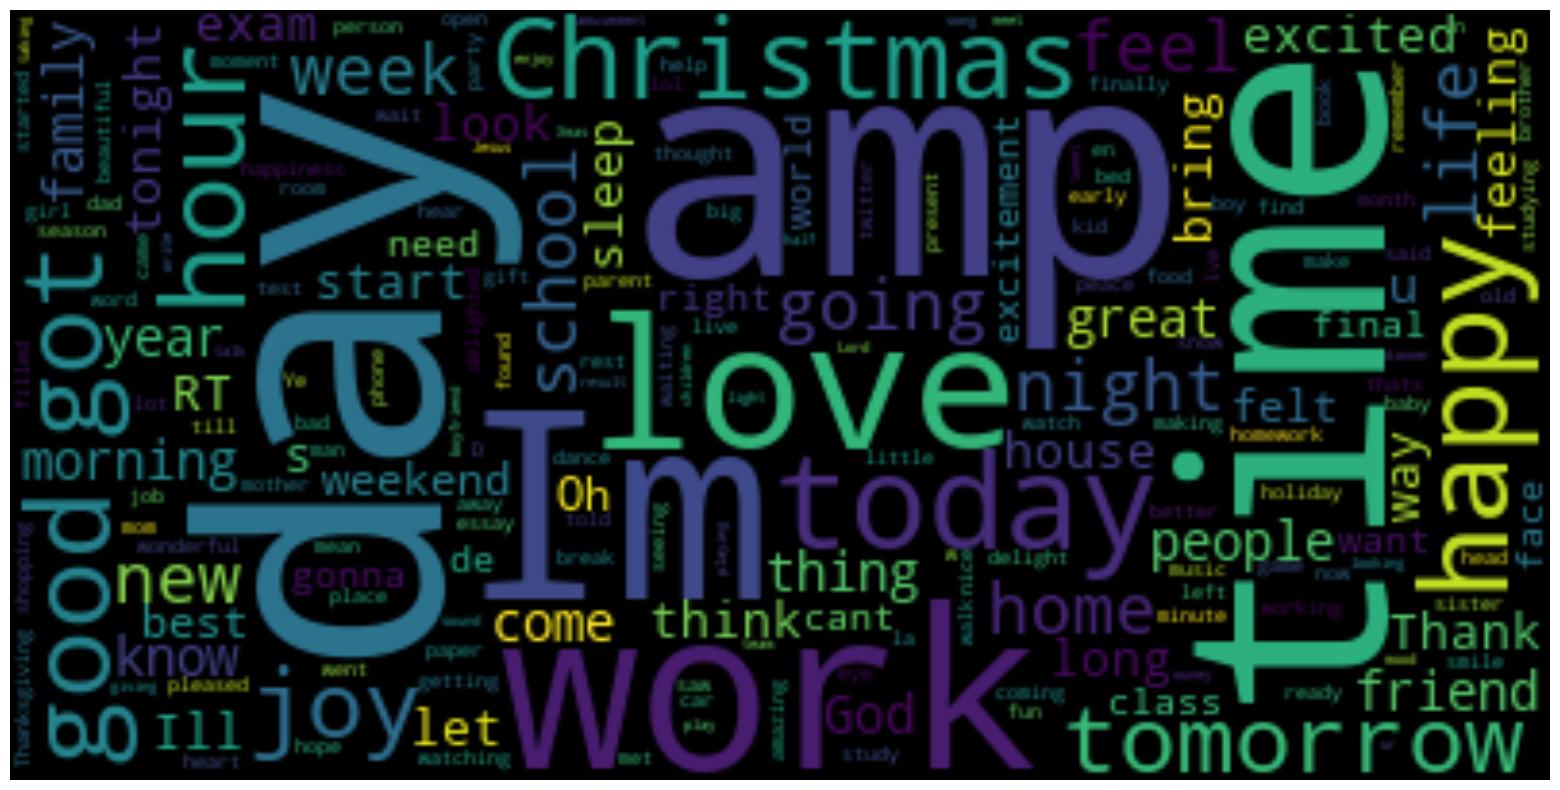

In [38]:
plot_cloud(joy_docx)

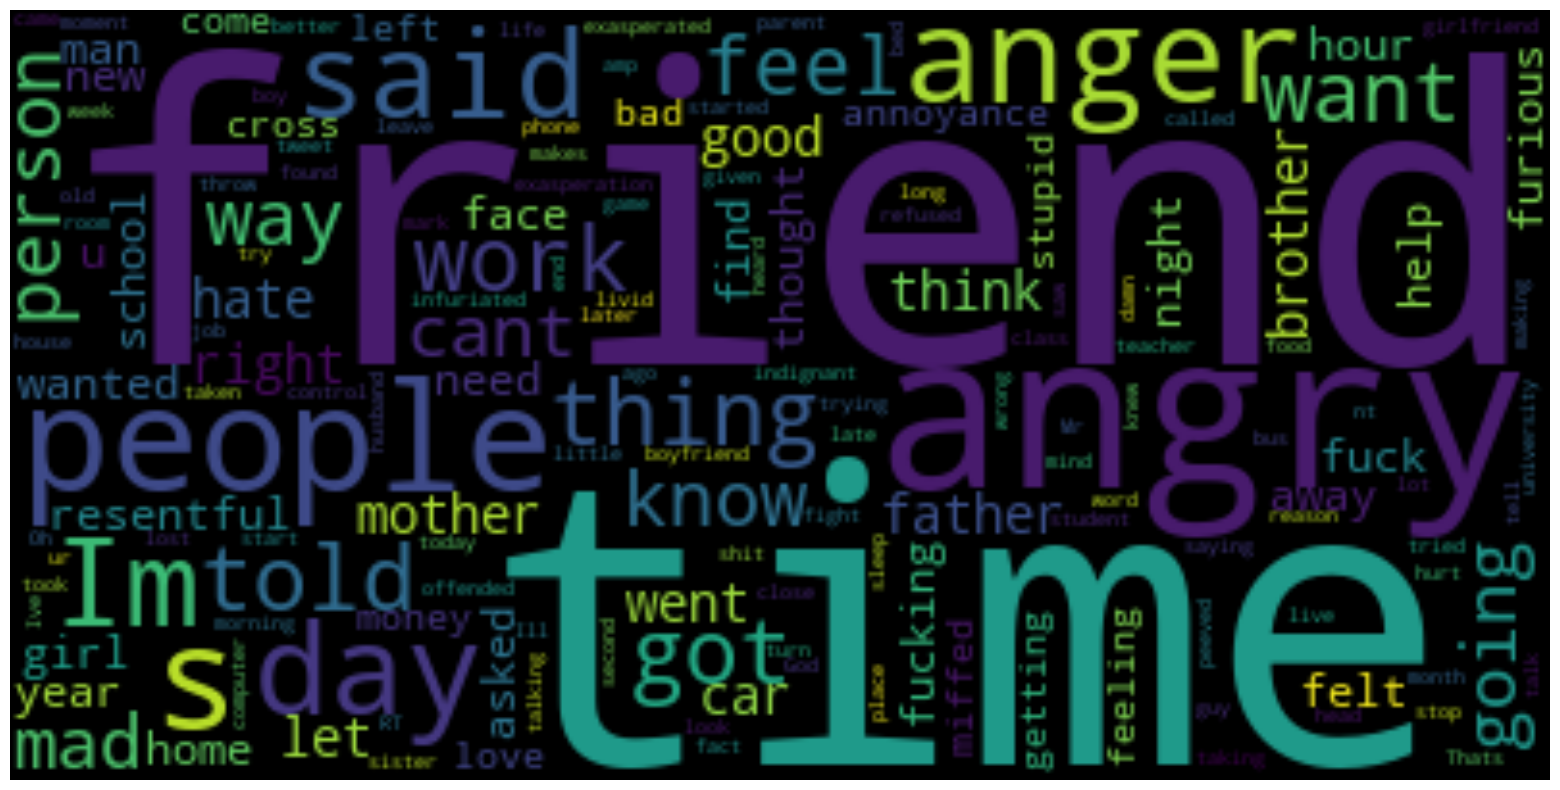

In [39]:
plot_cloud(anger_docx)

## Model Prediction -  Machine Learning

### Importing necessary machine learning libraries

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.model_selection import train_test_split

Mapping the features to a variable

In [41]:
x_label=df['Clean_text']
y_label=df['Emotion']

In [42]:
x_label

0                                                         
1                           Sage Act upgrade list tommorow
2        WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3        eye  true hazel eyeand brilliant  Regular feat...
4          ugh babe hugggzzz u  babe naamazed nga ako e...
                               ...                        
34787           gift Hope like it hand wear  Itll warm Lol
34788           world didnt meso world DEFINITELY cnt away
34789                                    man robbed today 
34790                            Youu JEALOUSY #Losing YOU
34791                                think baby dream time
Name: Clean_text, Length: 34792, dtype: object

In [43]:
y_label

0         neutral
1             joy
2         sadness
3             joy
4             joy
           ...   
34787    surprise
34788         joy
34789       anger
34790        fear
34791     sadness
Name: Emotion, Length: 34792, dtype: object

### Model Fitting

In [44]:
cv=CountVectorizer()
x=cv.fit_transform(x_label)

In [45]:
cv.get_feature_names_out()

array(['00', '000', '000ème', ..., 'ღƪ', 'ℕoíʀ', 'ㄒʜℰℳℰ'], dtype=object)

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y_label,test_size=0.2)

Logistic Regression is used for training the model and predicting the message 

In [47]:
model=LogisticRegression()
model.fit(x_train,y_train)

E:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy Score of the model is calculated

In [48]:
model.score(x_test,y_test)

0.638597499640753

In [49]:
y_pred=model.predict(x_test)
y_pred

array(['fear', 'joy', 'sadness', ..., 'joy', 'joy', 'joy'], dtype=object)

A sample text is given to test the model for emotion prediction

In [50]:
sample=["get lost idiot"]

In [51]:
vt=cv.transform(sample).toarray()
model.predict(vt)

array(['anger'], dtype=object)

Probabilty of the emotion occurence is calculated

In [52]:
#probability check
model.predict_proba(vt)

array([[0.31940338, 0.08475148, 0.07877448, 0.17434608, 0.12416397,
        0.11724536, 0.00232068, 0.09899458]])

#### Emotion classes

In [53]:
model.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [54]:
def pred_emotion(sample,model):
    vect=cv.transform(sample).toarray()
    pred=model.predict(vect)
    pred_proba=model.predict_proba(vect)
    pred_percetage=dict(zip(model.classes_,pred_proba[0]))
    print("Prediction : {}, Prediction Score: {}".format(pred[0],np.max(pred_proba)))
    print(pred[0])
    return pred_percetage

The emotion is predicted and the corresponding prediction score is displayed

In [55]:
pred_emotion(sample,model)

Prediction : anger, Prediction Score: 0.3194033804521572
anger


{'anger': 0.3194033804521572,
 'disgust': 0.08475147521892691,
 'fear': 0.07877447831803772,
 'joy': 0.1743460849811725,
 'neutral': 0.12416397087689997,
 'sadness': 0.11724535603649933,
 'shame': 0.0023206789077525602,
 'surprise': 0.0989945752085537}

In [56]:
pred_emotion(["I love running"],model)

Prediction : joy, Prediction Score: 0.44960583627020445
joy


{'anger': 0.057144978939997676,
 'disgust': 0.008424439979082796,
 'fear': 0.16537071041528986,
 'joy': 0.44960583627020445,
 'neutral': 0.10147633176888075,
 'sadness': 0.08943160049518917,
 'shame': 0.0011068299900268237,
 'surprise': 0.1274392721413284}

### Model Evaluation

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       anger       0.67      0.55      0.60       887
     disgust       0.59      0.25      0.35       173
        fear       0.72      0.70      0.71      1032
         joy       0.64      0.76      0.70      2200
     neutral       0.59      0.74      0.66       482
     sadness       0.59      0.57      0.58      1355
       shame       0.95      0.75      0.84        28
    surprise       0.60      0.44      0.51       802

    accuracy                           0.64      6959
   macro avg       0.67      0.60      0.62      6959
weighted avg       0.64      0.64      0.63      6959



### Constructing a confusion matrix for the model

In [58]:
confusion_matrix(y_test,y_pred)

array([[ 489,    6,   55,  145,   44,  123,    0,   25],
       [  23,   44,   17,   39,    9,   29,    0,   12],
       [  45,    0,  723,  140,   23,   65,    0,   36],
       [  58,    9,   88, 1682,   89,  182,    0,   92],
       [  10,    2,   11,   63,  356,   30,    0,   10],
       [  74,   10,   74,  303,   59,  777,    0,   58],
       [   0,    0,    1,    5,    0,    0,   21,    1],
       [  33,    4,   32,  258,   22,  100,    1,  352]], dtype=int64)

E:\ANACONDA\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


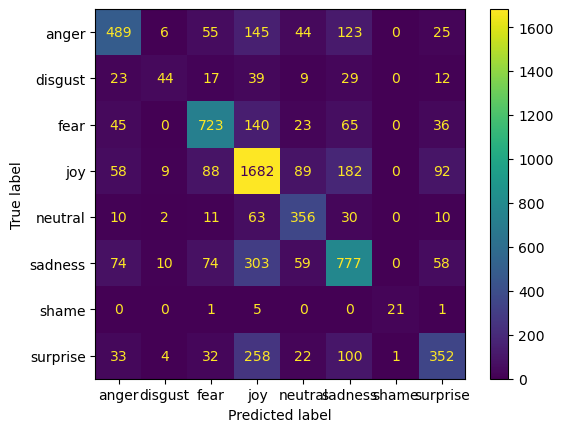

In [59]:
plot_confusion_matrix(model,x_test,y_test)